# RNNで時系列データを予測するモデルを作ろう

## データの読み込み

In [0]:
import numpy as np
import pandas as pd

df = pd.read_csv('LSTM_data.csv', header=None,encoding="UTF-8")
df = np.array(df)

## 空のリストを用意しデータを格納

In [0]:
data = []
target = []
num = 25

for i in range(0, len(df) - num):
    data.append(df[i: i + num])
    target.append(df[i + num])

data[0]

## RNNの入力形式に変更

In [0]:
X = np.array(data).reshape(len(data), num, 1)
Y = np.array(target).reshape(len(data), 1)

len(X[0][0])

1

## 学習用データとテストデータに分割

In [0]:
from sklearn.model_selection import train_test_split

# データ設定
N_train = int(len(data) * 0.9)
N_validation = len(data) - N_train

X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X, Y, test_size=N_validation)



## LSTMのモデルを作成しよう



In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam

# LSTMモデルを定義
def lstm(data, n_in, n_hidden, n_out):
    model = Sequential()
    
    # LSTM
    model.add(LSTM(n_hidden, kernel_initializer='random_uniform', input_shape=(data, n_in)))
    model.add(Dense(n_out, kernel_initializer='random_uniform'))
    model.add(Activation('linear'))
    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
 
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

## 学習を実行しよう

In [0]:
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle

n_in = len(X[0][0])     # 1
n_hidden = 30           # 隠れ層の数 
n_out = len(Y[0])       # 1

model = lstm(num, n_in, n_hidden, n_out)

epochs = 500
batch_size = 10
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)


model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_validation, Y_validation),
          callbacks=[early_stopping])


Train on 158 samples, validate on 18 samples
Epoch 1/500
158/158 [==============================] - 1s 4ms/step - loss: 0.4922 - val_loss: 0.4818
Epoch 2/500
158/158 [==============================] - 0s 1ms/step - loss: 0.4210 - val_loss: 0.4078
Epoch 3/500
158/158 [==============================] - 0s 1ms/step - loss: 0.2849 - val_loss: 0.3816
Epoch 4/500
158/158 [==============================] - 0s 1ms/step - loss: 0.2078 - val_loss: 0.2273
Epoch 5/500
158/158 [==============================] - 0s 1ms/step - loss: 0.1140 - val_loss: 0.1013
Epoch 6/500
158/158 [==============================] - 0s 1ms/step - loss: 0.0479 - val_loss: 0.0404
Epoch 7/500
158/158 [==============================] - 0s 1ms/step - loss: 0.0277 - val_loss: 0.0169
Epoch 8/500
158/158 [==============================] - 0s 1ms/step - loss: 0.0181 - val_loss: 0.0162
Epoch 9/500
158/158 [==============================] - 0s 1ms/step - loss: 0.0134 - val_loss: 0.0101
Epoch 10/500
158/158 [========================

## 予測値を計算しグラフ描画で可視化しよう

<Figure size 6000x6000 with 0 Axes>

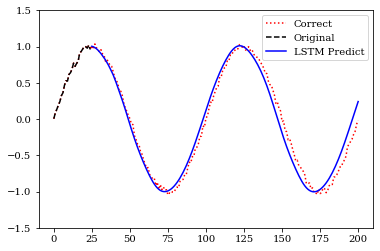

In [0]:
import matplotlib.pyplot as plt

# 最初に予測用の最初のデータを準備
Z = X[:1] 

original = [df[i] for i in range(num)] # グラフ描画用。ここまでのデータを使って予測している。
predicted = [None for i in range(num)] # 内包表記　25個目まで何も入ってない空のリストを用意する

# 26番目以降の予測データ
for i in range(len(df) - num):
    z_ = Z[-1:]
    y_ = model.predict(z_)
    sequence_ = np.concatenate(
        (z_.reshape(num, n_in)[1:], y_),
        axis=0).reshape(1, num, n_in)
    # print(Z.shape)
    Z = np.append(Z, sequence_, axis=0)
    predicted.append(y_.reshape(-1))

fig = plt.figure(figsize=(30,30), dpi=200)
plt.rc('font', family='serif')
plt.figure()
plt.ylim([-1.5, 1.5])
plt.plot(df, linestyle='dotted', color='red', label='Correct')
plt.plot(original, linestyle='dashed', color='black', label='Original')
plt.plot(predicted, color='blue', label='LSTM Predict')
plt.legend()
plt.show()